In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import json


In [2]:
dataPath = Path('data')
# dataPath.mkdir(exist_ok=True)


In [3]:
def menuExchanges() :
    global dataPath
    exchanges = [exchange.name for exchange in dataPath.glob('*') if exchange.is_dir()]
    while True :
        for i, exchange in enumerate(exchanges) :
            print("{0}) {1}".format(i, exchange))
        choix = input("Choix : ")
        try : 
            choix = int(choix)
            if choix>=0 and choix<len(exchanges) : 
                return exchanges[choix]
        except:
            pass

In [4]:
def menuPeriode() :
    periodes = { 'd':'jour', 'h':'heure', 'm':'minute'}
    while True :
        for (k, v) in periodes.items() :
            print('{0}) {1}'.format(k,v))
        choix = input("Choix : ").lower()
        if choix in periodes : return choix

In [18]:
def loadData(exchange, periode) :
    global dataPath
    allData = {}
    for file in (dataPath / exchange).glob('*.' + periode) :
        data = json.loads(file.read_text())
        allData[file.stem] = { int(time):(d['high']+d['low'])/2 for time, d in data.items() }
        #allData[file.stem] = dict([(int(time), (d['high']+d['low'])/2) for time, d in data.items()])
    return allData

In [6]:
exchange = menuExchanges()

0) Kraken
Choix : 0


In [14]:
periode = menuPeriode()

d) jour
h) heure
m) minute
Choix : h


In [22]:
data = loadData(exchange, periode)

In [9]:
if False :
    plt.figure(figsize=(14,10))
    i=1
    k = list(data.keys())[i]
    plt.plot(data[k].keys(), data[k].values(), label=k)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    print(i, k)
    #print(len(data[k]))
    print(data[k])

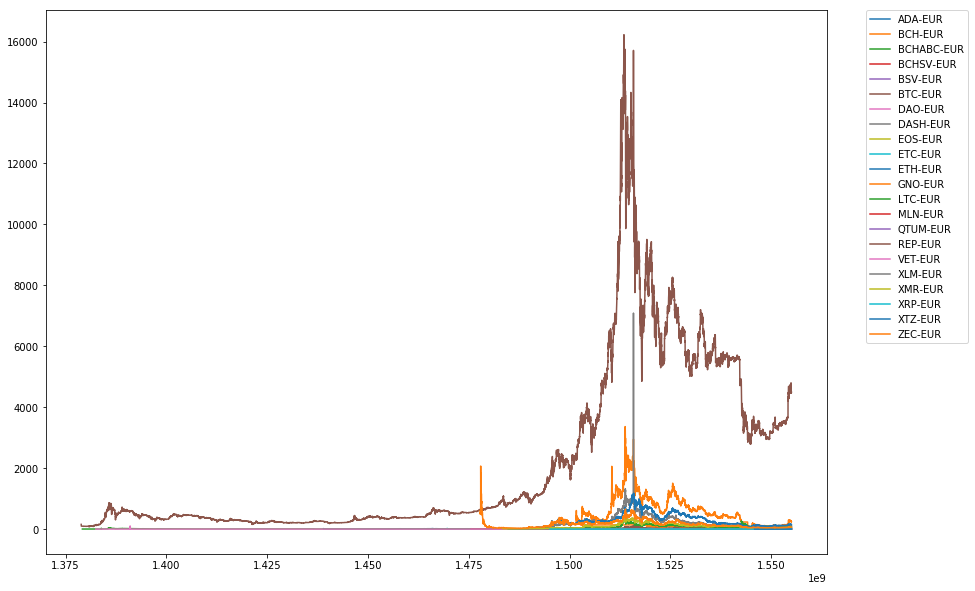

In [23]:
plt.figure(figsize=(14,10))
for k, d in data.items() :
    plt.plot(d.keys(), d.values(), label=k)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()